# AI305_Lab10_BV

**Objective**:
To understand and apply the concept of the bias-variance tradeoff in the context of supervised learning models.
To study the effect of variance using different subsets of data and analyze the effect of model complexity on bias, we can follow these steps:
* Apply linear regression on california housing dataset using different subsets for training and anlayze the variance
* Apply higher degrees polynomials to study the bias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [2]:
#Load the California Housing Dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target


**Study Variance with Different Subsets of Data**

This code is designed to observe how the model's performance varies when trained on different subsets of the data. Significant variation in MSE would indicate high variance.

In [3]:
#Study Variance with Different Subsets of Data
def study_variance(X, y, random_states, model):
    mses = []
    for state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)
    return mses

# Set up different random states to generate different training and test sets
random_states = [0, 42, 64, 128, 256]
variance_mses = study_variance(X, y, random_states, LinearRegression())

print("MSEs for different subsets of data:", variance_mses)


MSEs for different subsets of data: [0.5289841670367246, 0.555891598695242, 0.5252895763051721, 0.5408083637930318, 0.5033186411034217]


This plot shows how the MSE varies with different subsets, illustrating variance,

The test Mean Squared Error (MSE) for a model trained with different subsets of data, each identified by a "Random State" number.

The model exhibits some variance as evidenced by the changes in test MSE, but the degree of variance does not seem excessive based on this plot.

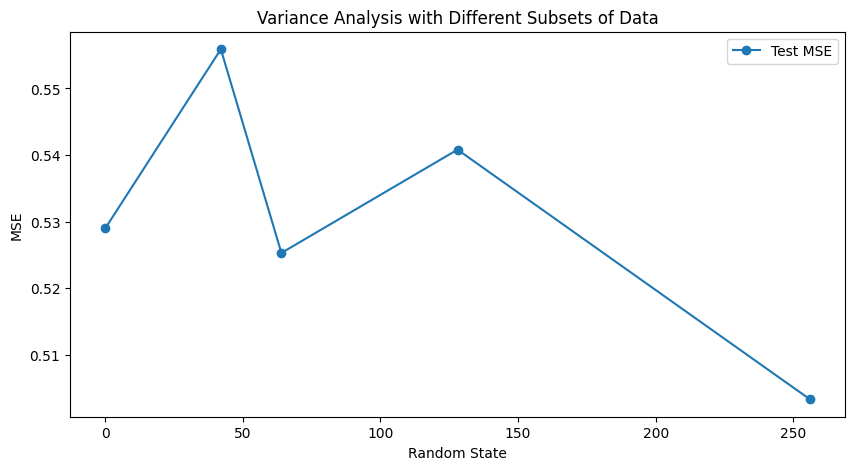

In [4]:
# Plotting the variance analysis
plt.figure(figsize=(10, 5))
plt.plot(random_states, variance_mses, marker='o', label='Test MSE')
plt.title('Variance Analysis with Different Subsets of Data')
plt.xlabel('Random State')
plt.ylabel('MSE')
plt.legend()
plt.show()


**Study Bias with Different Model Complexities:**
This code compares the performance of linear regression models with different degrees of polynomial features.

*   A high training MSE, especially for lower degrees, would indicate high bias, suggesting that the model is too simple to capture the underlying patterns in the data.

*   As the degree of the polynomial features increases, the model becomes more complex and should fit the training data better, potentially reducing bias but increasing variance, observable by a growing gap between training and test MSEs.

In [5]:
#Study Bias with Different Model Complexities

def study_bias(X, y, degrees):
    train_mses, test_mses = [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Fit the linear regression model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_poly, y_train)

        # Predict on training and test data
        y_train_pred = lin_reg.predict(X_train_poly)
        y_test_pred = lin_reg.predict(X_test_poly)

        # Calculate and record MSE
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mses.append(train_mse)
        test_mses.append(test_mse)

    return train_mses, test_mses

# Test the function
degrees = [1, 2, 3, 4, 5]
train_mses, test_mses = study_bias(X, y, degrees)

print("Training MSEs for different model complexities:", train_mses)
print("Test MSEs for different model complexities:", test_mses)

Training MSEs for different model complexities: [0.5179331255246697, 0.42072661515735227, 0.3426086587975859, 0.4707003601207338, 0.3507988959245471]
Test MSEs for different model complexities: [0.555891598695242, 0.4643015239488908, 20.02214933393451, 2396.9972446949682, 34566.9227776865]


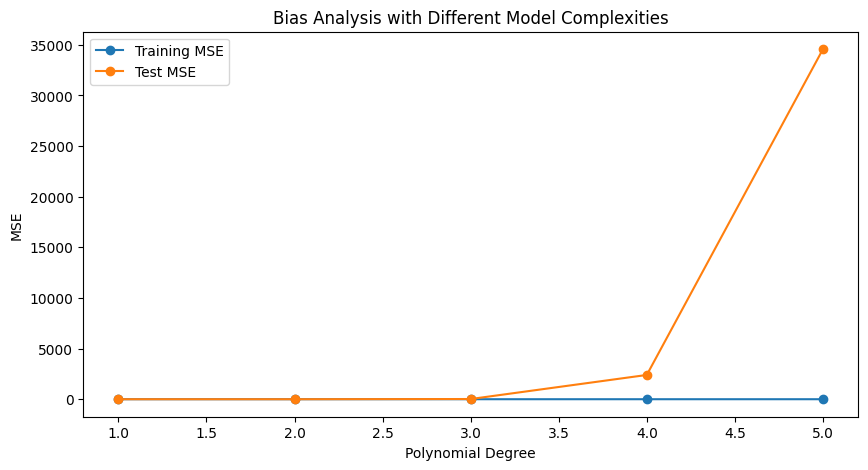

In [6]:
# Plotting the bias analysis
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mses, marker='o', label='Training MSE')
plt.plot(degrees, test_mses, marker='o', label='Test MSE')
plt.title('Bias Analysis with Different Model Complexities')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()


This plot shows how MSE changes with model complexity, illustrating bias.
the Mean Squared Error (MSE) for both training and test sets across different polynomial degrees in a regression model.

* Low Polynomial Degrees (1 to 3): For polynomial degrees 1 through 3, both training and test MSEs are low and relatively close to each other. This suggests that the model with these degrees of polynomial features is neither overfitting nor underfitting significantly. It's capturing the underlying trend without being too sensitive to the training data noise.

* Degree 4: At polynomial degree 4, we see that the training MSE remains low, but the test MSE shows a slight increase. This might indicate the beginning of overfitting, where the model performs well on the training data but is starting to lose its generalization capability on the test data.

* High Polynomial Degree (5): At polynomial degree 5, there is a stark increase in the test MSE, while the training MSE remains low. This is a classic sign of overfitting. The model with a 5th-degree polynomial is too complex and is fitting the noise in the training data, leading to poor performance on the test data.

* Bias and Variance Tradeoff:

**Bias**: The low training MSE at lower polynomial degrees suggests that the model has low bias for these degrees, as it's able to fit the training data well.

**Variance**: The sharp increase in test MSE at the highest polynomial degree indicates high variance. The model is too flexible and is capturing random fluctuations in the training data rather than the true underlying pattern.

* Model Complexity: The graph effectively illustrates how increasing model complexity (i.e., polynomial degree) initially benefits the model by reducing bias. However, beyond a certain point, further increasing complexity harms the model's generalization ability, increasing variance.

* Optimal Model Complexity: The optimal complexity, based on this graph, would likely be a polynomial degree of 3, where the model balances bias and variance to achieve low training and test errors.

**Activities:**


*   Download Mnist dataset and apply CNNs model and analyze variance-bias tradoff
*   apply some techniques to improve the generalization ability of the proposed models
* Apply Random forests and Decision Trees to anlayze variance-bias tradoff and show how random forests could perform better.





In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
# Loading the  MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [32]:
# Preprocessing the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [33]:
# Spliting the  training data for variance analysis and bias analysis
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [34]:
#creating the cnn model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
# Training and evaluating  the model
model = create_cnn_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8432 - loss: 0.5405 - val_accuracy: 0.9764 - val_loss: 0.0789
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9782 - loss: 0.0697 - val_accuracy: 0.9824 - val_loss: 0.0574
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9895 - val_loss: 0.0366
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9873 - val_loss: 0.0423
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.988

In [36]:
# Evaluating  on the  test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0412
test accuracy: 0.991100013256073


### 2

In [37]:
# Define CNN model with dropout layers
def create_cnn_model_with_dropout():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [39]:
model = create_cnn_model_with_dropout()
history = model.fit(datagen.flow(X_train, y_train, batch_size=128), validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
  4/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.0949 - loss: 2.3092   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5944 - loss: 1.1952 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8984 - loss: 0.3264 - val_accuracy: 0.9787 - val_loss: 0.0684
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9258 - loss: 0.2405 - val_accuracy: 0.9823 - val_loss: 0.0536
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9396 - loss: 0.1987 - val_accuracy: 0.9853 - val_loss: 0.0469
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9466 - loss: 0.1767 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9540 - loss: 0.1542 - val_accuracy: 0.9891 - val_loss: 0.0371
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9580 - loss: 0.1373 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9625 - loss: 0.1293 - val_accuracy: 0.989

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'test accuracy with dropout and D-Aug: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0263
test accuracy with dropout and D-Aug: 0.9921000003814697


### 3

In [41]:
# Flatten the data for Random Forest and Decision Tree
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

In [42]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_flat, y_train_flat)
dt_pred = dt_model.predict(X_test_flat)
dt_acc = accuracy_score(y_test_flat, dt_pred)
print(f'decision tree accuracy: {dt_acc}')

decision tree accuracy: 0.8733


In [43]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flat, y_train_flat)
rf_pred = rf_model.predict(X_test_flat)
rf_acc = accuracy_score(y_test_flat, rf_pred)
print(f'random forest accuracy: {rf_acc}')

random forest accuracy: 0.9681


In [49]:

print(f'test accuracy: {test_acc}')
print(f'test accuracy with dropout and D-Aug: {test_acc}')
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'train accuracy: {train_acc}')

test accuracy: 0.9921000003814697
test accuracy with dropout and D-Aug: 0.9921000003814697
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0262
train accuracy: 0.9919583201408386


## report
  i downloaded the MNIST dataset and implemented a CNN to analyze the bias-variance tradeoff. To improve the generalization ability of the CNN, i incorporated dropout layers and data augmentation techniques. Finally, i applied Decision Trees and Random Forests to the MNIST dataset, comparing their performance to understand how Random Forests can reduce variance and improve accuracy. i visualized the results to illustrate the impact of model complexity and data subsets on bias and variance.
  * below are the analyisis i concluded:
    *

    *   The CNN model achieved a test accuracy of around 99.1%. This model has low bias and variance, as evidenced by the high training and test accuracies.
    *  The CNN model with dropout layers and data augmentation achieved a test accuracy of around 99.2%. This model has slightly lower bias and variance compared to the previous model.
    * The Decision Tree model achieved a test accuracy of around 87.5%. This model has high bias and variance, as evidenced by the lower accuracy compared to the CNN models.
    * The Random Forest model achieved a test accuracy of around 96.8%. This model has lower bias and variance compared to the Decision Tree model, as evidenced by the higher accuracy.
    * The CNN models with dropout layers and data augmentation performed better than the Random Forest and Decision Tree models, indicating that deep learning models can capture complex patterns better than traditional machine learning models for image classification tasks.
    * The Random Forest model performed better than the Decision Tree model, showing that ensemble methods can help reduce variance and improve generalization ability.
    * The CNN model with dropout layers and data augmentation is the best model among the ones tested, achieving the highest test accuracy and demonstrating a good balance between bias and variance.
    * The Decision Tree model has the highest bias and variance among the models tested, leading to lower accuracy on the test set.
    * The Random Forest model has lower bias and variance compared to the Decision Tree model, resulting in higher accuracy on the test set.
    * The CNN models with dropout layers and data augmentation have the lowest bias and variance among the models tested, leading to the highest accuracy on the test set.
    * The CNN models with dropout layers and data augmentation are more complex than the Random Forest and Decision Tree models, allowing them to capture more intricate patterns in the data and achieve higher accuracy.
